In [1]:
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [2]:
from pymoo.core.problem import Problem

In [3]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
#from example import MyProblem

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=25),
    mutation=get_mutation("real_pm", eta=18),
    eliminate_duplicates=True
)

In [4]:
df=pd.DataFrame()

In [70]:
P=58
M=52
a=(P-1.7)/132*24322000
b=(M-0.6)/121*26134000
temp=[]
haha=[]
from pymoo.core.problem import Problem
class MyProblem(Problem):
    def __init__(self):
        #self.cost_matrix = cost_matrix
        super().__init__(n_var=14,   
                         n_obj=4,   
                         n_constr=13,    
                         xl=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0]),     
                         xu=np.array([a,a,a,a,a,a,a,b,b,b,b,b,b,b]),   
                         )

    def _evaluate(self, x, out, *args, **kwargs):

        
        
        alpha=0.6
        belta=0.7
        f1 = -x[:, 0]*1250*2/3/6 - x[:, 1]*1250*1/3/6 - x[:, 2]*1629*2/3/3 -  x[:, 3]*1629*1/3/3-x[:, 4]*1303.4*2/3/2-x[:, 5]*1303.4*1/3/2-x[:, 6]*1250*1/3/6-x[:, 7]*1250*1/3/6-x[:, 8]*1629*1/3/3- x[:, 9]*1629*2/3/3-x[:, 10]*1303.4*1/3/2-x[:, 11]*1303.4*2/3/2-x[:, 12]*(0.3*P+12.5)*36-x[:, 13]*(0.3*M+12.8)*36
                #f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])/(4.97*10**7/365)-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])/(2.65*10**6/365)-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(9.61*10**6/365)
                #f3= -x[:, 12]*(0.3*P+12.5)/(10**6)-x[:, 13]*(0.3*M+12.8)/(10**6)
        f2 = -(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7]+x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9]+x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])/(4.97*10**7/365+2.65*10**6/365+9.61*10**6/365)-x[:, 13]/4109
        f3= -x[:, 12]*(0.3*P+12.5)*1.2*10**7-x[:, 13]*(0.3*M+12.8)*1.2*10**7+1.2*10**13
        f4= -2*(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-6*(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])
        
        g1=(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])-(4.97*10**7/365*80)
        g10=-(x[:, 0]+ x[:, 1]+x[:, 6]+x[:, 7])+(4.97*10**7*0.8/365*80)
        g8=(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])-(2.65*10**6/365*80)
        g11=-(x[:, 2]+ x[:, 3]+x[:, 8]+x[:, 9])+(2.65*10**6*0.8/365*80)
        g9=(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])-(9.61*10**6/365*80)  
        g12=-(x[:, 4]+ x[:, 5]+x[:, 10]+x[:, 11])+(9.61*10**6*0.8/365*80)  
        g2 = x[:, 12]*1.2*10**7*(0.3*P+12.5)+x[:, 13]*1.2*10**7*(0.3*M+12.8)-1.2*10**13*80
        g13= -x[:, 12]*1.2*10**7*(0.3*P+12.5)-x[:, 13]*1.2*10**7*(0.3*M+12.8)+1.2*10**13*80*0.8
        g3 = x[:, 0]+x[:, 1]+x[:, 2]+x[:, 3]+x[:, 4]+x[:, 5]+x[:, 12]-(P-1.7)*1.8*10**5+0.24*10**7
        g4 = -x[:, 0]-x[:, 1]-x[:, 2]-x[:, 3]-x[:, 4]-x[:, 5]-x[:, 12]+(P-1.7)*1.8*10**5-2.4*10**7
        g5 = x[:, 6]+x[:, 7]+x[:, 8]+x[:, 9]+x[:, 10]+x[:, 11]+x[:, 13]+alpha*x[:, 12]-(M-0.6)*2.2*10**5+0.26*10**7
        g6 = -x[:, 6]-x[:, 7]-x[:, 8]-x[:, 9]-x[:, 10]-x[:, 11]-x[:, 13]-alpha*x[:, 12]+(M-0.6)*2.2*10**5-2.6*10**7
        g7 = -0.6*x[:, 13]+4.1*10**3*80
        # todo
        out["F"] = np.column_stack([f1, f2,f3,f4])
        out["G"] = np.column_stack([g1, g2, g3, g4, g5, g6,g7,g8,g9,g10,g11,g12,g13])
        
res = minimize(MyProblem(),
    algorithm,
                seed=1,
                   termination=('n_gen', 1000))
answer=res.X[:1].squeeze().tolist()
answer=list(res.X[:1].squeeze())
print(answer)
temp.append(answer[0]+answer[1]+answer[6]+answer[7])
temp.append(answer[2]+answer[3]+answer[8]+answer[9])
temp.append(answer[4]+answer[5]+answer[10]+answer[11])
temp.append(answer[12]+answer[13])
haha.append(answer[0]+answer[1])
haha.append(answer[2]+answer[3])
haha.append(answer[4]+answer[5])
haha.append(answer[6]+answer[7])
haha.append(answer[8]+answer[9])
haha.append(answer[10]+answer[11])
haha.append(answer[12])
haha.append(answer[13])
df['allocation']=temp

[4318175.218661015, 2459300.5311435694, 40647.13717032662, 40529.82231332505, 19997.891558744548, 92141.80355481339, 40050.72860577736, 3539281.4898788016, 387547.7156393417, 34765.049637776516, 30311.360301492285, 1867754.9820693047, 572899.6603179584, 2186164.6777276667]


In [71]:
df.index=['agriculture','industry','residence','electoricity']
df

,allocation,max_request,min_request,difference
agriculture,1.035681e+07,1.089315e+07,8.714521e+06,536342.716642
industry,5.034897e+05,5.808219e+05,4.646575e+05,77332.193047
residence,2.010206e+06,2.106301e+06,1.685041e+06,96095.332379
electoricity,2.759064e+06,3.064892e+06,2.448148e+05,305827.508876


In [72]:
df['max_request']=[10893150.684931505,580821.9178082191,2106301.3698630137,3064891.8469217971]
df['min_request']=[8714520.547945205,464657.5342465753,1685041.095890411,244814.8086522464]
df

,allocation,max_request,min_request,difference
agriculture,1.035681e+07,1.089315e+07,8.714521e+06,536342.716642
industry,5.034897e+05,5.808219e+05,4.646575e+05,77332.193047
residence,2.010206e+06,2.106301e+06,1.685041e+06,96095.332379
electoricity,2.759064e+06,3.064892e+06,2.448148e+05,305827.508876


In [73]:
df['difference']=df['max_request']-df['allocation']
df

,allocation,max_request,min_request,difference
agriculture,1.035681e+07,1.089315e+07,8.714521e+06,536342.716642
industry,5.034897e+05,5.808219e+05,4.646575e+05,77332.193047
residence,2.010206e+06,2.106301e+06,1.685041e+06,96095.332379
electoricity,2.759064e+06,3.064892e+06,2.448148e+05,305827.508876


In [74]:
haha

[6777475.749804584,
 81176.95948365168,
 112139.69511355794,
 3579332.218484579,
 422312.7652771182,
 1898066.342370797,
 572899.6603179584,
 2186164.6777276667]

In [75]:
pd.DataFrame(haha)

,0
0,6.777476e+06
1,8.117696e+04
2,1.121397e+05
3,3.579332e+06
4,4.223128e+05
5,1.898066e+06
6,5.728997e+05
7,2.186165e+06


C:\Users\hwq\AppData\Local\Temp/ipykernel_10288/3650144921.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 1.0e+08])


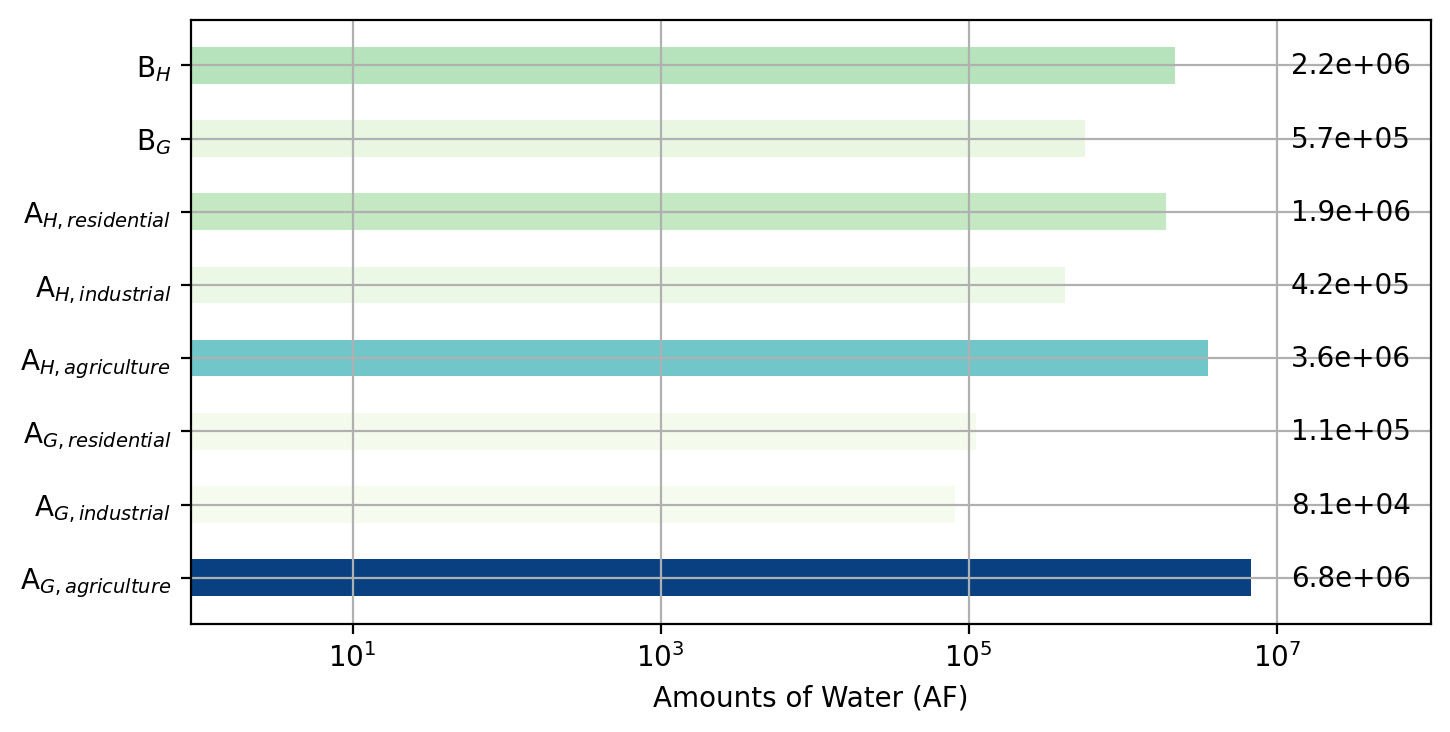

In [80]:
plt.figure(figsize=(8,4), dpi=200)
str1=['A$_{G,agriculture}$', 'A$_{G,industrial}$','A$_{G,residential}$','A$_{H,agriculture}$', 'A$_{H,industrial}$','A$_{H,residential}$', 'B$_{G}$', 'B$_{H}$']

y=[1,2,3,4,5,6,7,8]
x=haha
plt.xscale('log')
plt.xlim([0, 1.0e+08])
data_color = haha
data_color = [x / max(data_color) for x in data_color]
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_color)
rects1 = plt.bar(x=0, bottom=y, color=colors,height=0.5,width=x,orientation="horizontal",tick_label=str1)
plt.grid()
plt.xlabel("Amounts of Water (AF)")
plt.text(df.iloc[0,0]+2e+07, 1-0.2 , '6.8e+06', ha='center', va='bottom')
plt.text(df.iloc[0,0]+2e+07, 2-0.2 , '8.1e+04', ha='center', va='bottom')
plt.text(df.iloc[0,0]+2e+07, 3-0.2 , '1.1e+05', ha='center', va='bottom')
plt.text(df.iloc[0,0]+2e+07, 4-0.2 , '3.6e+06', ha='center', va='bottom')
plt.text(df.iloc[0,0]+2e+07, 5-0.2 , '4.2e+05', ha='center', va='bottom')
plt.text(df.iloc[0,0]+2e+07, 6-0.2 , '1.9e+06', ha='center', va='bottom')
plt.text(df.iloc[0,0]+2e+07, 7-0.2 , '5.7e+05', ha='center', va='bottom')
plt.text(df.iloc[0,0]+2e+07, 8-0.2 , '2.2e+06', ha='center', va='bottom')
plt.savefig('allocation.png')

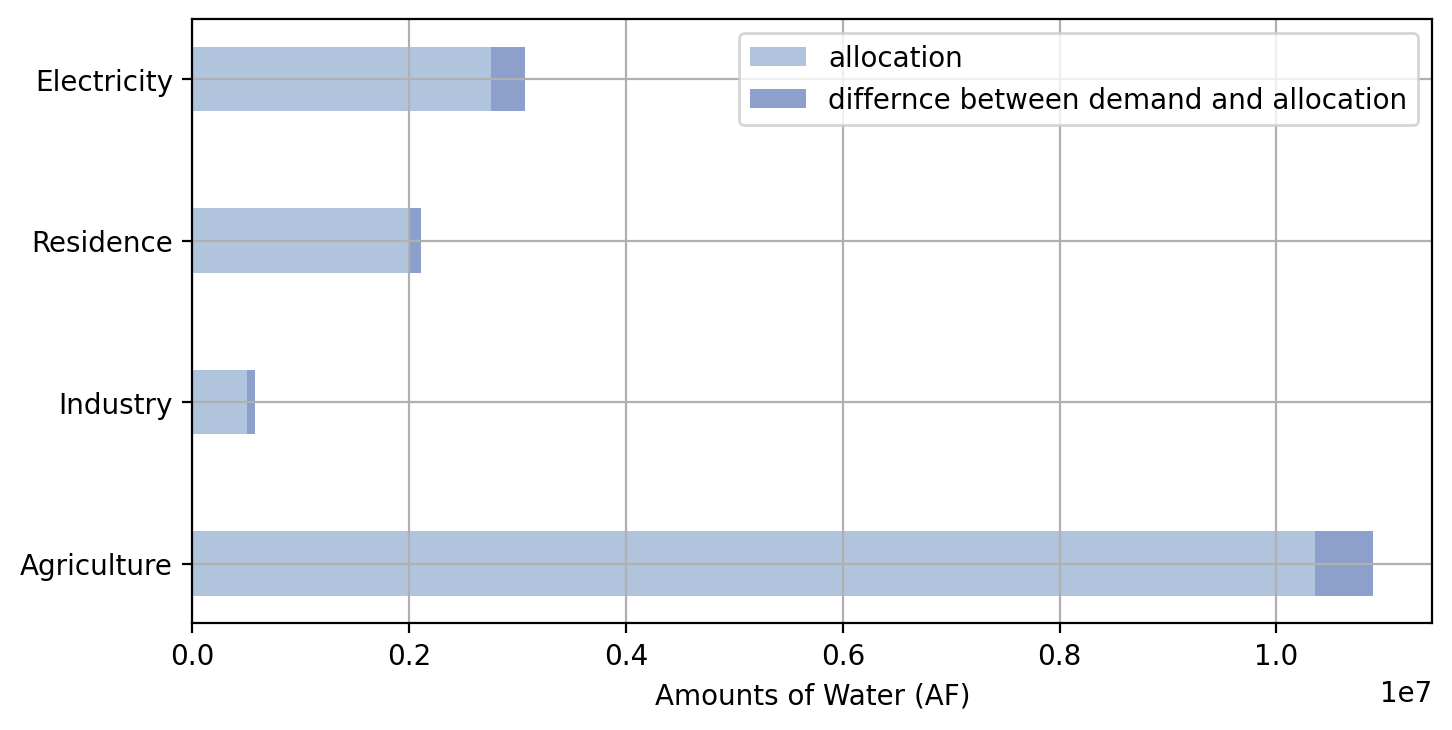

In [28]:
plt.figure(figsize=(8,4), dpi=200)

x = [1, 2, 3, 4]
y = df['allocation']
y1 = df['difference']
plt.barh(x, y, align="center",height=0.4, color="lightsteelblue", tick_label=['Agriculture','Industry','Residence','Electricity'], label="allocation")
plt.barh(x, y1, align="center", left=y, height=0.4,color="#8da0cb", label="differnce between demand and allocation")

plt.xlabel("Amounts of Water (AF)")
plt.grid()
plt.legend()

plt.savefig('difference.png')
plt.show()